In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import plotly.express as px
import re
import string


In [2]:
import pandas as pd

df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['entity', 'sentiment', 'empty', 'text']
df.drop(columns='empty', inplace=True)
df.head()


,entity,sentiment,text
0,2401,Borderlands,im getting on borderlands and i will murder yo...
1,2401,Borderlands,I am coming to the borders and I will kill you...
2,2401,Borderlands,im getting on borderlands and i will kill you ...
3,2401,Borderlands,im coming on borderlands and i will murder you...
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...


In [4]:
def clean(text):
    if isinstance(text, str):  # Check if input is a string
        text = text.lower()  # lowercase
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
        text = re.sub(r'\@\w+|\#', '', text)  # remove @ and #
        text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
        return text
    else:
        return ""  # Return empty string for non-text values


In [5]:
df['cleaned_text'] = df['text'].apply(clean)


<Axes: xlabel='sentiment'>

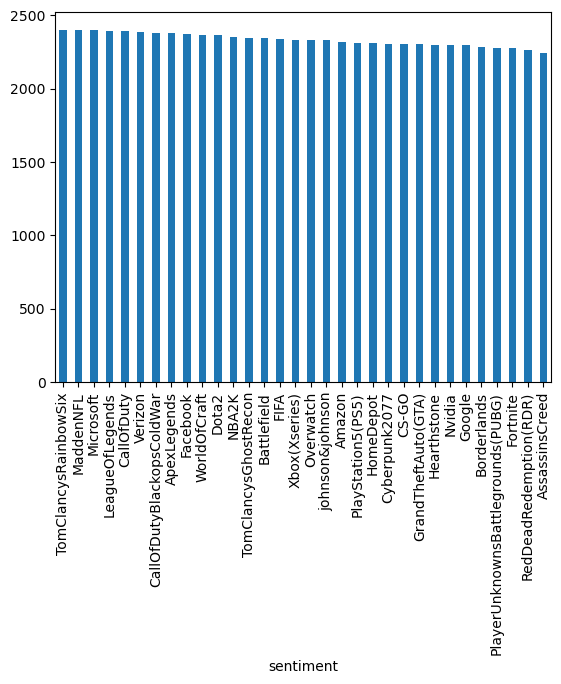

In [6]:
df['sentiment'].value_counts().plot(kind='bar')


In [8]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['predicted'] = df['cleaned_text'].apply(get_sentiment)


In [9]:
print(df[['sentiment', 'predicted']].head())


     sentiment predicted
0  Borderlands   Neutral
1  Borderlands   Neutral
2  Borderlands   Neutral
3  Borderlands   Neutral
4  Borderlands   Neutral


In [11]:
df.to_csv("final_sentiment_output.csv", index=False)
